# Red Dragon

In this notebook, we train the red dragon algorithm on the SDSS dataset.

----------------------------------------------

Data from SDSS + SPIDERS

----------------------------------------------

HOW DATA WAS CONSTRUCTED:

	1. Cluster data (from catCluster-SPIDERS_RASS_CLUS-v3.0.fits) is joined
	with BCG data (from SpidersXclusterBCGs-v2.0.fits). Some clusters are
	dropped out because no BCG data.

	2. Use astroquery to query SDSS galaxies within 2*R200c of each cluster. R200c
	estimated from Lx assuming an X-ray Luminosity --- halo mass relation.


HOW TO READ THIS DATA:

	The HDF5 files were written using the pandas python package.
	You can quickly load them and turn them into 2D numpy arrays
	using the following commands:

	*****

	import pandas as pd
	import numpy as np

	Galaxy_data  = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Galaxies').to_numpy()
	Cluster_data = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Clusters').to_numpy()


	*****

	Each of 'Galaxy_data' and 'Cluster_data' will be a 2D numpy array 
	that you can index into using slicing.

	If you leave them as pandas dataframes you can also quickly access
	an individual column and turn it into a numpy array via:

	******

	Pandas_Series = Galaxy_data  [quantity_name]
	Numpy_array   = Galaxy_data  [quantity_name].values

	
	******


NOTES:
	1. 

---------------------------------------

Cluster Catalog properties

---------------------------------------

CLUZSPEC: Spectroscopic redshift of cluster BCG


---------------------------------------

Galaxy catalog properties
---------------------------------------

CLUS_ID: The SPIDERS ID of the cluster. Can use this to join Cluster Catalog properties
	 with the Galaxy Catalog.
     
v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


<AxesSubplot:>

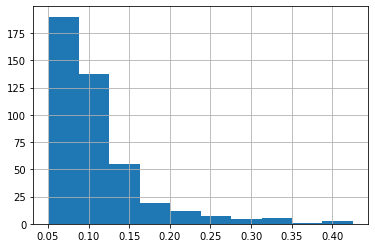

In [3]:
Cluster_data.R200C_DEG.hist()

In [4]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [5]:
list(Galaxy_data.columns)

['ra',
 'dec',
 'specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'zWarning',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g',
 'cModelMag_i',
 'cModelMagErr_i',
 'flags_i',
 'extinction_i',
 'cModelMag_z',
 'cModelMagErr_z',
 'flags_z',
 'extinction_z']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [6]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,275146375168,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,275213484104,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,275154731264,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,275154764032,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789


In [7]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

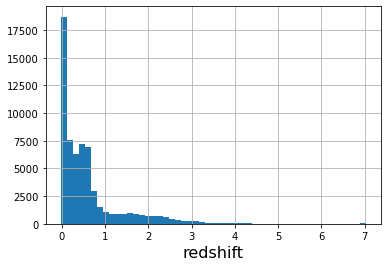

In [8]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

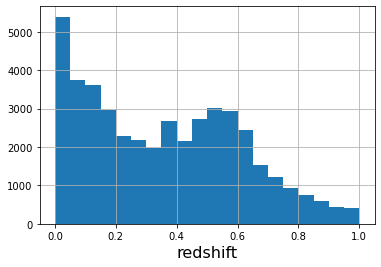

In [9]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

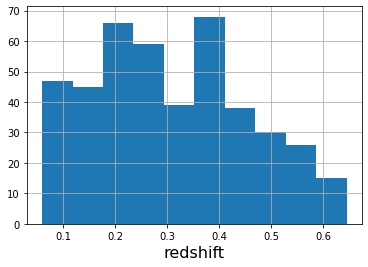

In [10]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

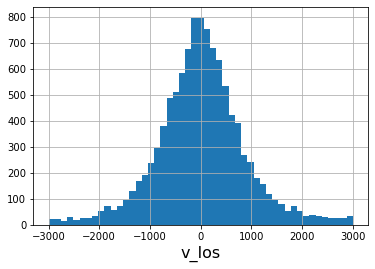

In [11]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)

Distance from the Center
---------------------------------------

To have the phase space we need first to compute the distance from the center, $R/R_{200}$.

In [12]:
def aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=1/60):
    '''
    Get circles with rmax (Mpc) around each cluster position

    Parameters
    ----------
    ra : float, array
    cluster and galaxy, right ascension of the object in degrees.
    dec : float, array
    cluster and galaxy, declination of the object in degrees.
    ang_diam_dist: array
    angular distance in Mpc
    rmax : float
    aperture radius in Mpc

    Returns
    -------
    indicies_into_galaxies_in_aperture : array
    indices for the galaxies in the circles
    indicies_into_clusters : array
    indices for the cluster table
    radii: array
    relative distance from the center in Mpc
    '''
    import esutil 
    depth=10
    h=esutil.htm.HTM(depth)
    #Inner match
    m1i,m2i,disti=h.match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,radius=r_aper,maxmatch=0)

    indicies_into_galaxies_in_aperture=[]
    indicies_into_clusters=[]
    for i in range(len(ra_cluster)):
        w_i=np.where(m1i==i)
        indicies_into_galaxies_in_aperture_i=m2i[w_i]
        indicies_into_galaxies_in_aperture.append(indicies_into_galaxies_in_aperture_i)
        indicies_into_clusters_i = m1i[w_i]
        indicies_into_clusters.append(indicies_into_clusters_i)

    indicies_into_galaxies_in_aperture=np.concatenate(indicies_into_galaxies_in_aperture)
    indicies_into_clusters=np.concatenate(indicies_into_clusters)

    #radii = np.array( disti*(np.pi/180)*ang_diam_dist[indicies_into_clusters] )

    return indicies_into_galaxies_in_aperture, indicies_into_clusters, disti


In [13]:
ra_cluster    = Cluster_data.RA.to_numpy()
dec_cluster   = Cluster_data.DEC.to_numpy()

ra_galaxy     = Galaxy_data.ra.to_numpy()
dec_galaxy    = Galaxy_data.dec.to_numpy()

rmax          = Cluster_data.R200C_DEG.to_numpy()
id0,id1,radii = aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=2.2*rmax)

In [14]:
rnorm = radii/rmax[id1]
zcls  = Cluster_data.Z_LAMBDA.to_numpy()[id1]

In [15]:
vlos = Galaxy_data.v_los.to_numpy()[id0]
cut  = np.abs(vlos)<1500.

In [16]:
rlabel=r'$R/R_{200}$'

Text(0, 0.5, 'N')

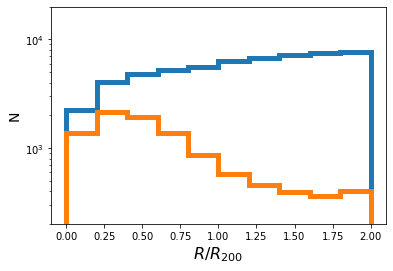

In [17]:
rbins = np.linspace(0.,2.,11)
area  = np.pi*(rbins[1:]**2-rbins[:-1]**2)

_  = plt.hist(rnorm,bins=rbins[:],histtype='step',lw=5)
_  = plt.hist(rnorm[cut],bins=rbins[:],histtype='step',lw=5)
plt.yscale('log')
plt.ylim(2e2,2e4)
plt.xlabel(rlabel,fontsize=16)
plt.ylabel(r'N',fontsize=14)

Text(0, 0.5, '$v_{los}$ [km/s]')

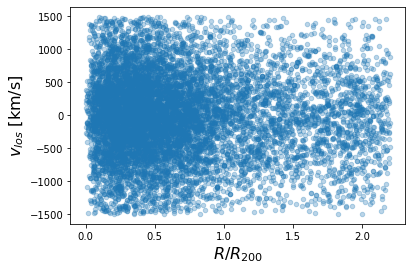

In [18]:
# def plot_phase_space():
plt.scatter(rnorm[cut],vlos[cut],alpha=0.3,s=20)
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}$ [km/s]',fontsize=16)

In [19]:
import seaborn as sns
sns.set_context('notebook')

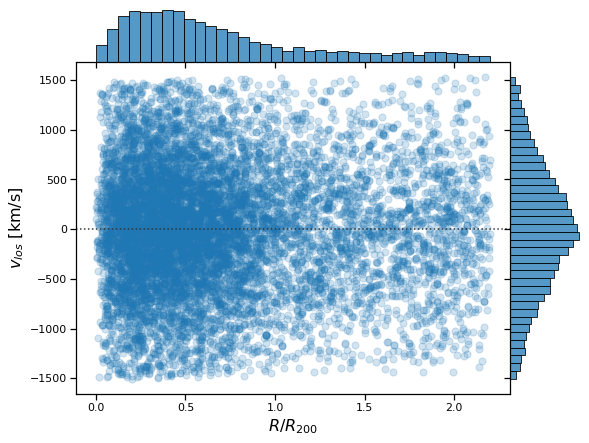

In [20]:
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="scatter", s=10, alpha=0.3, space=0)
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)},ylim=(-1650,1650))
ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
ax.fig.set_figwidth(8)



Statstistics 
---------------------------------------

Let's compute the number of galaxies per cluster and check the magnitude completeness of the sample.

In [21]:
mag = Galaxy_data.cModelMag_r.to_numpy()[id0]

In [22]:
ddec= (dec_galaxy[id0]-dec_cluster[id1])/rmax[id1]
dra = (ra_galaxy[id0]-ra_cluster[id1])*np.cos(dec_galaxy[id0]* np.pi / 180. )/rmax[id1]

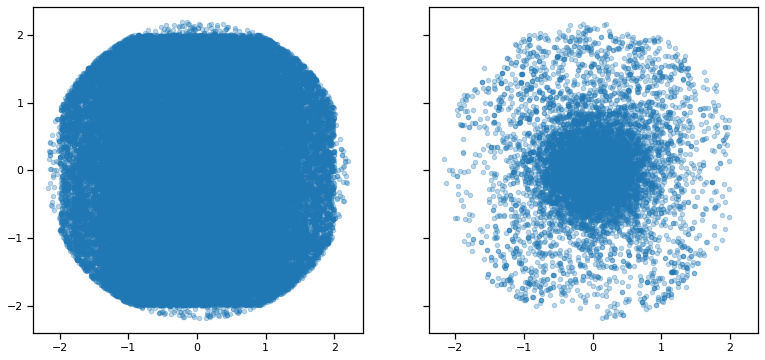

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(13,6), sharex='all',sharey='all')

axis[0].scatter(dra[::1],ddec[::1],s=20,alpha=0.3)
axis[1].scatter(dra[cut][::1],ddec[cut][::1],s=20,alpha=0.3)

In [24]:
#ax = sns.jointplot(x=dra, y=ddec, kind="kde", space=0)

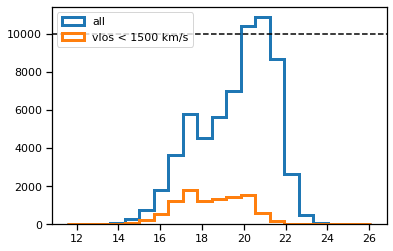

In [25]:
a = plt.hist(mag,bins=21,histtype='step',lw=3,label='all')
_ = plt.hist(mag[cut],bins=a[1],histtype='step',lw=3,label='vlos < 1500 km/s')
plt.axhline(1e4,color='k',ls='--')
# plt.yscale('log')
plt.legend(loc=2)
# plt.ylim(0.5,2e5)

In [26]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [67]:
#zbins = np.percentile(Cluster_data.Z_LAMBDA.to_numpy(),np.linspace(0,100,6))
zbins = np.percentile(zcls[cut],np.linspace(0,100,10))
keys, zmed = make_bins(zcls,zbins)

zlabel = ['%.3f < z < %.3f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]

In [68]:
zbins

array([0.06017453, 0.07197442, 0.10053096, 0.12878802, 0.17704824,
       0.21546409, 0.26503325, 0.3539649 , 0.39901805, 0.64430189])

In [29]:
keys

[array([ 1112,  1113,  1114, ..., 62502, 62503, 62504]),
 array([    0,     1,     2, ..., 62041, 62042, 62043]),
 array([  274,   275,   276, ..., 61924, 61925, 61926]),
 array([  565,   566,   567, ..., 62697, 62698, 62699])]

In [30]:
mag

array([18.00145, 21.12879, 17.12869, ..., 21.94861, 19.88644, 19.88644])

Text(0.5, 0, 'r-band')

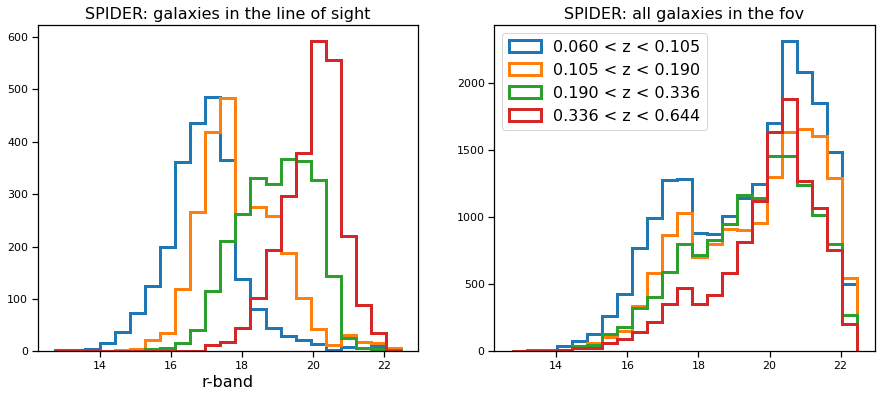

In [31]:
fig, axis = plt.subplots(1, 2, figsize=(15,6), sharex='all')

a = np.histogram(mag[cut],bins=31)

for i,ix in enumerate(keys):
    _ = axis[0].hist(mag[ix[cut[ix]]] ,bins=a[1][:24],histtype='step',lw=3,label=zlabel[i])
    _ = axis[1].hist(mag[ix] ,bins=a[1][:24],histtype='step',lw=3,label=zlabel[i])
    
# plt.axhline(1e4,color='k',ls='--')
# plt.yscale('log')
plt.legend(fontsize=16,loc=2)
# plt.ylim(0.5,2e5)
axis[0].set_title('SPIDER: galaxies in the line of sight',fontsize=16)
axis[1].set_title('SPIDER: all galaxies in the fov',fontsize=16)
axis[0].set_xlabel('r-band',fontsize=16)

In [32]:
ncls = Cluster_data.RA.size
ntot = mag.size
ncut = np.count_nonzero(cut)
print('Number of Galaxies')
print('all: %i'%ntot)
print('cut: %i'%ncut)
print()

Number of Galaxies
all: 62700
cut: 10212



In [33]:
print('Number of clusters: %i \n'%ncls)
print('Number of galaxies per cluster')
print('all: %.2f'%(ntot/ncls))
print('cut: %.2f'%(ncut/ncls))

Number of clusters: 433 

Number of galaxies per cluster
all: 144.80
cut: 23.58



Run: Red Dragon
---------------------------------------

Steps:
* Only Cluster Galaxies, wider and finer redshift bin
* All galaxies, finer redshift bin
* All galaxies, 3 components model

In [34]:
path = '/Users/jesteves/Documents/repos/red-dragon-gamma'

import sys
sys.path.append(path)

import rd_gamma as redDragon

In [35]:
import h5py

In [36]:
def create_red_dragon_infile(fname,id0):
    print('create red dragon input file\n')
    print('columns  : Z, bands, Z_err, bands_err')
    print('file name: %s'%fname)
    bands = ['g','r','i','z']
    data  = [Galaxy_data.z.to_numpy()[id0]]
    data.append(np.vstack([Galaxy_data['cModelMag_%s'%(bi)].to_numpy()[id0] for bi in bands]).T)
    data.append(Galaxy_data.zErr.to_numpy()[id0])
    data.append(np.vstack([Galaxy_data['cModelMagErr_%s'%(bi)].to_numpy()[id0] for bi in bands]).T)
    
    hd = h5py.File(fname,'w')
    hd.create_dataset('Z',data=data[0])
    hd.create_dataset('bands',data=data[1])
    hd.create_dataset('Z_err',data=data[2])
    hd.create_dataset('bands_err',data=data[3])
    hd.close()    

### Cluster Galaxies

In [159]:
fname='../data/in.hf5'

mcut = mag<21. ##r-band
sel  = id0[cut&mcut]

create_red_dragon_infile(fname,sel)

create red dragon input file

columns  : Z, bands, Z_err, bands_err
file name: ../data/in.hf5


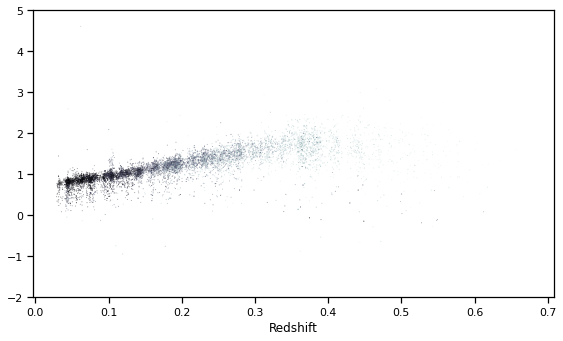

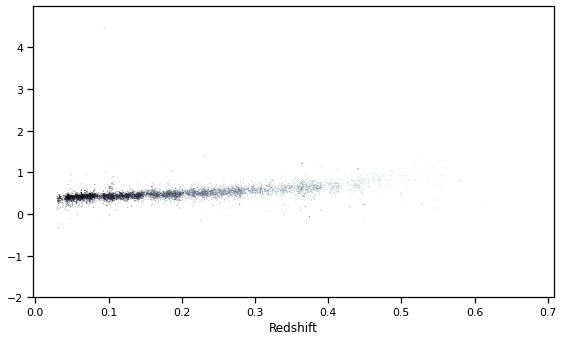

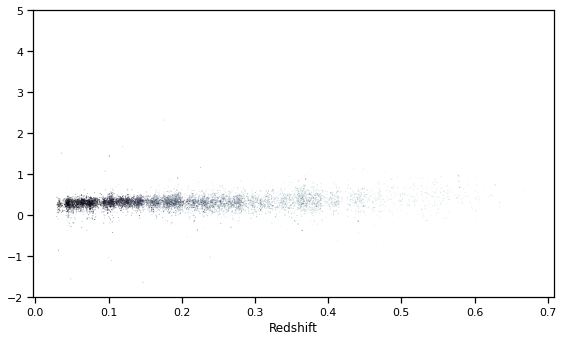

In [160]:
redDragon.plot_cZ(fname)

We clearly see the red sequence up to redshift 0.4 but after that we don't see a clear signal. This seems to be a natual redshift cut.

The data is very sparse, specially for the blue cloud.

In [161]:
redDragon.fit_file(fname,N_fit=2,fname_out='../data/out_2K.h5',
                   Z_min=0.06, Z_max=0.4,dZ_0=0.03, dZ_1=0.015)

Sparse fitting...
1/10: Z|[0.06,0.094) -> 1159 galaxies
2/10: Z|[0.094,0.128) -> 1285 galaxies
3/10: Z|[0.128,0.162) -> 825 galaxies
4/10: Z|[0.162,0.196) -> 1072 galaxies
5/10: Z|[0.196,0.23) -> 655 galaxies
6/10: Z|[0.23,0.264) -> 753 galaxies
7/10: Z|[0.264,0.298) -> 595 galaxies
8/10: Z|[0.298,0.332) -> 380 galaxies
9/10: Z|[0.332,0.366) -> 610 galaxies
10/10: Z|[0.366,0.4) -> 634 galaxies
Saved ../data/tmp_out_2K.h5
Finer fitting...
1/22: Z|[0.06,0.07545) -> 667 galaxies
2/22: Z|[0.07545,0.09091) -> 424 galaxies
dt: 2.0 s (4 s total)
3/22: Z|[0.09091,0.1064) -> 720 galaxies
dt: 2.0 s (6 s total)
4/22: Z|[0.1064,0.1218) -> 436 galaxies
dt: 2.0 s (8 s total)
5/22: Z|[0.1218,0.1373) -> 404 galaxies
dt: 2.1 s (10 s total)
6/22: Z|[0.1373,0.1527) -> 413 galaxies
dt: 2.1 s (12 s total)
7/22: Z|[0.1527,0.1682) -> 374 galaxies
dt: 2.1 s (14 s total)
8/22: Z|[0.1682,0.1836) -> 411 galaxies
dt: 2.1 s (16 s total)
9/22: Z|[0.1836,0.1991) -> 591 galaxies
dt: 2.1 s (19 s total)
10/22: Z|[0.199

/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:907: RuntimeWarning: overflow encountered in exp
  log_S[U[k]] += np.exp(log_p[k]) # actually S, not logS
/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:789: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(log_L_ - log_L) < tol * np.abs(log_L) and moved.size == 0:


dt: 2.7 s (32 s total)
16/22: Z|[0.2918,0.3073) -> 180 galaxies
dt: 2.1 s (34 s total)
17/22: Z|[0.3073,0.3227) -> 212 galaxies


/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


dt: 2.2 s (36 s total)
18/22: Z|[0.3227,0.3382) -> 150 galaxies
dt: 2.4 s (39 s total)
19/22: Z|[0.3382,0.3536) -> 195 galaxies
dt: 2.4 s (41 s total)
20/22: Z|[0.3536,0.3691) -> 460 galaxies
dt: 2.6 s (44 s total)
21/22: Z|[0.3691,0.3845) -> 335 galaxies
dt: 2.7 s (46 s total)
22/22: Z|[0.3845,0.4) -> 175 galaxies
Saved ../data/out_2K.h5


There are less than 1000 galaxies per redshift bin, in the higher redshift bins the fit has even less objects. 

The blue cloud is not well constrained.

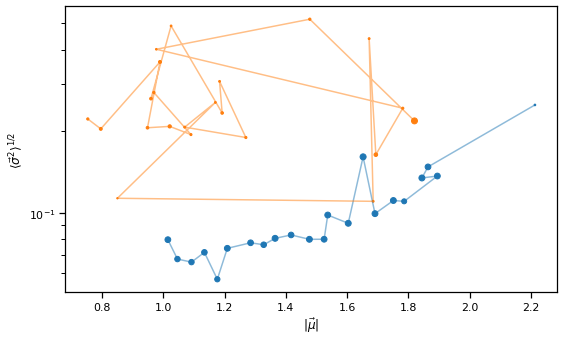

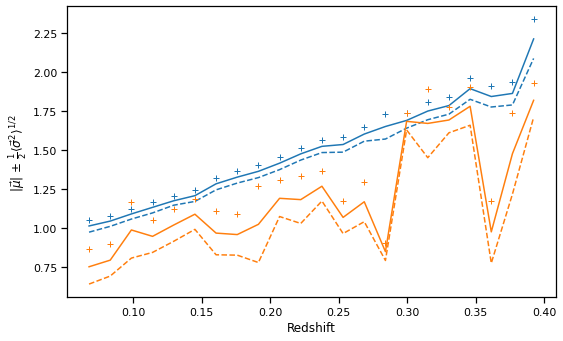

In [189]:
rd = redDragon.dragon('../data/out_2K.h5',factor=-5.)
redDragon.plot_WMS(rd)

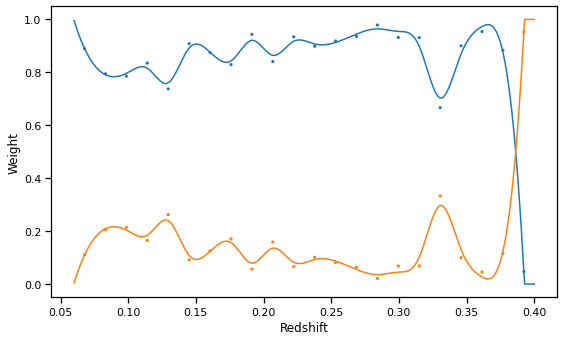

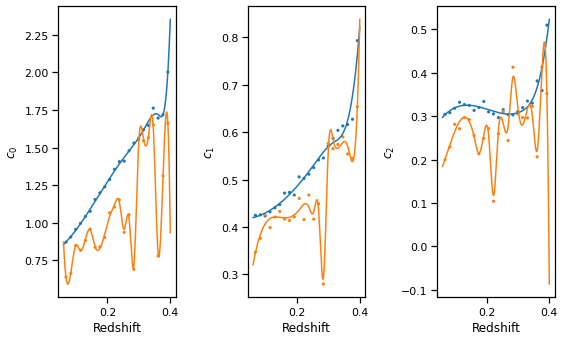

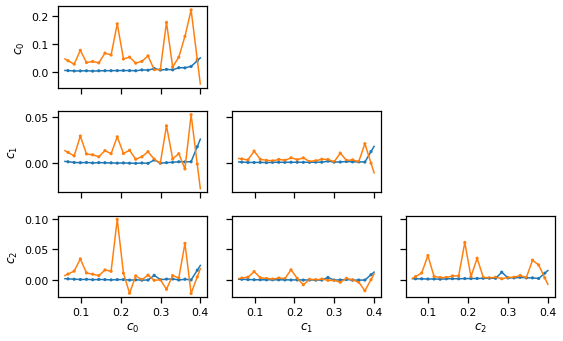

In [190]:
redDragon.plot_fit(rd)

### All Sample

If we consider only cluster galaxies we don't have enough objects to constraint the blue cloud. In this case, we lose our constraints and we consider all galaxies in our sample.

In [191]:
fname='../data/in_test.hf5'

mcut = mag<21. ## r-band
sel  = id0[mcut]

create_red_dragon_infile(fname,sel)

create red dragon input file

columns  : Z, bands, Z_err, bands_err
file name: ../data/in_test.hf5


/Users/jesteves/Documents/repos/red-dragon-gamma/rd_gamma.py:987: RuntimeWarning: divide by zero encountered in log10
  z = [np.log10(Z_err), np.log10(col_err[:,ii]), np.sum(bands,axis=1), pred][c]
/Users/jesteves/Documents/repos/red-dragon-gamma/rd_gamma.py:987: RuntimeWarning: invalid value encountered in log10
  z = [np.log10(Z_err), np.log10(col_err[:,ii]), np.sum(bands,axis=1), pred][c]


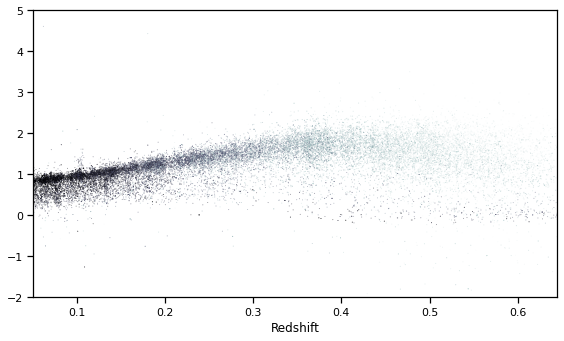

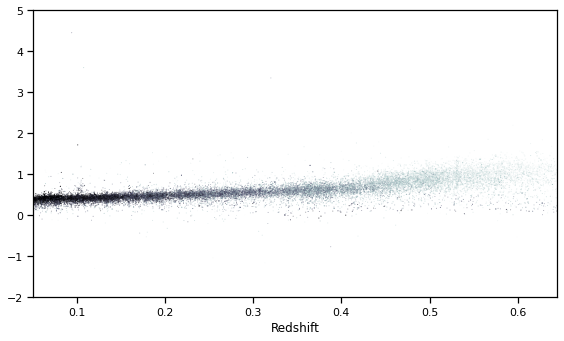

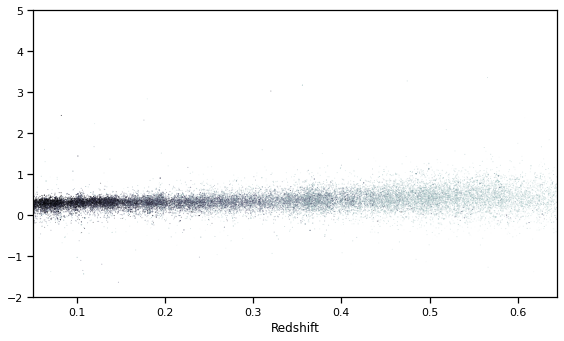

In [192]:
redDragon.plot_cZ(fname,xlim=[0.05,0.645])

In [193]:
redDragon.fit_file(fname,N_fit=2,fname_out='../data/out_2K_test.h5',
                   Z_min=0.06, Z_max=0.645,dZ_0=0.05, dZ_1=0.025)

Sparse fitting...
1/11: Z|[0.06,0.1132) -> 4275 galaxies
2/11: Z|[0.1132,0.1664) -> 3341 galaxies
3/11: Z|[0.1664,0.2195) -> 2778 galaxies
4/11: Z|[0.2195,0.2727) -> 2462 galaxies
5/11: Z|[0.2727,0.3259) -> 1992 galaxies
6/11: Z|[0.3259,0.3791) -> 2735 galaxies
7/11: Z|[0.3791,0.4323) -> 2120 galaxies
8/11: Z|[0.4323,0.4855) -> 2424 galaxies
9/11: Z|[0.4855,0.5386) -> 2756 galaxies
10/11: Z|[0.5386,0.5918) -> 2267 galaxies
11/11: Z|[0.5918,0.645) -> 1306 galaxies
Saved ../data/tmp_out_2K_test.h5
Finer fitting...
1/22: Z|[0.06,0.08659) -> 2357 galaxies
2/22: Z|[0.08659,0.1132) -> 1918 galaxies
dt: 2.1 s (4 s total)
3/22: Z|[0.1132,0.1398) -> 1883 galaxies
dt: 2.1 s (6 s total)
4/22: Z|[0.1398,0.1664) -> 1458 galaxies
dt: 2.1 s (9 s total)
5/22: Z|[0.1664,0.193) -> 1586 galaxies
dt: 2.2 s (11 s total)
6/22: Z|[0.193,0.2195) -> 1192 galaxies
dt: 2.2 s (13 s total)
7/22: Z|[0.2195,0.2461) -> 1287 galaxies
dt: 2.2 s (15 s total)
8/22: Z|[0.2461,0.2727) -> 1175 galaxies
dt: 2.3 s (17 s total

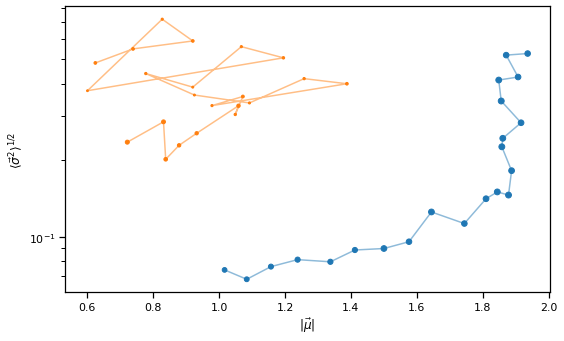

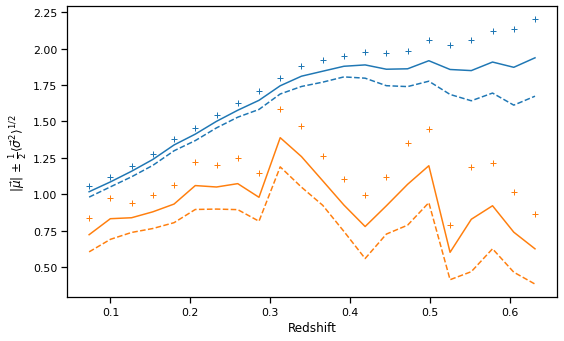

In [194]:
rd = redDragon.dragon('../data/out_2K_test.h5',factor=-10.)
redDragon.plot_WMS(rd)

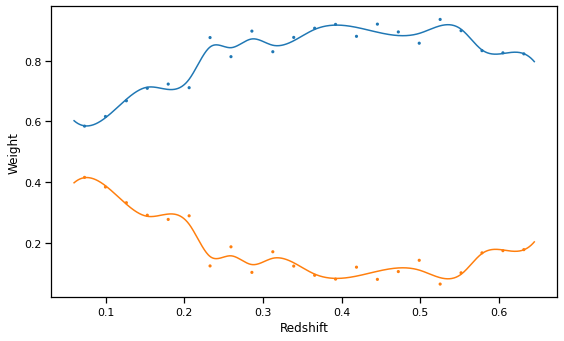

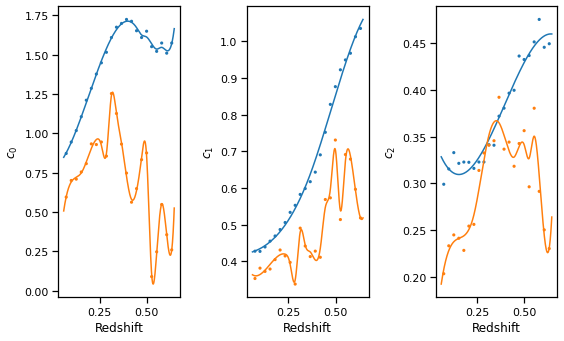

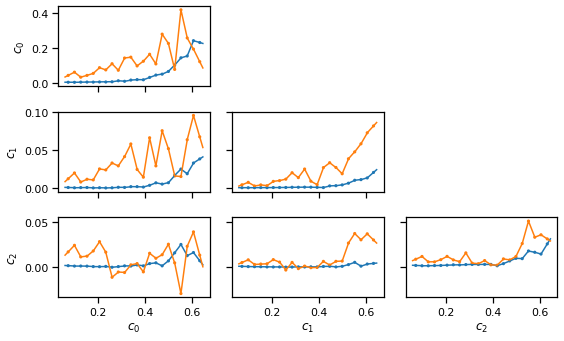

In [195]:
redDragon.plot_fit(rd)

The blue cloud is much better constrained with the whole sample and larger redshift bins. Mainly, because of the statistics for each redshift bin we have at least a 1000 galaxies.

### Finner Redshift Bins

In [196]:
redDragon.fit_file(fname,N_fit=2,fname_out='../data/out_2K_test2.h5',
                   Z_min=0.06, Z_max=0.645,dZ_0=0.025, dZ_1=0.01)

Sparse fitting...
1/22: Z|[0.06,0.08659) -> 2357 galaxies
2/22: Z|[0.08659,0.1132) -> 1918 galaxies
3/22: Z|[0.1132,0.1398) -> 1883 galaxies
4/22: Z|[0.1398,0.1664) -> 1458 galaxies
5/22: Z|[0.1664,0.193) -> 1586 galaxies
6/22: Z|[0.193,0.2195) -> 1192 galaxies
7/22: Z|[0.2195,0.2461) -> 1287 galaxies
8/22: Z|[0.2461,0.2727) -> 1175 galaxies
9/22: Z|[0.2727,0.2993) -> 1051 galaxies
10/22: Z|[0.2993,0.3259) -> 941 galaxies
11/22: Z|[0.3259,0.3525) -> 1038 galaxies
12/22: Z|[0.3525,0.3791) -> 1697 galaxies
13/22: Z|[0.3791,0.4057) -> 1130 galaxies
14/22: Z|[0.4057,0.4323) -> 990 galaxies
15/22: Z|[0.4323,0.4589) -> 1238 galaxies
16/22: Z|[0.4589,0.4855) -> 1186 galaxies
17/22: Z|[0.4855,0.512) -> 1550 galaxies
18/22: Z|[0.512,0.5386) -> 1206 galaxies
19/22: Z|[0.5386,0.5652) -> 1141 galaxies
20/22: Z|[0.5652,0.5918) -> 1126 galaxies
21/22: Z|[0.5918,0.6184) -> 720 galaxies
22/22: Z|[0.6184,0.645) -> 586 galaxies
Saved ../data/tmp_out_2K_test2.h5
Finer fitting...
Possible problems (large 

/usr/local/anaconda/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


2/57: Z|[0.07026,0.08053) -> 1008 galaxies
dt: 2.1 s (4 s total)
3/57: Z|[0.08053,0.09079) -> 595 galaxies
dt: 2.1 s (6 s total)
4/57: Z|[0.09079,0.1011) -> 729 galaxies
dt: 2.1 s (8 s total)
5/57: Z|[0.1011,0.1113) -> 915 galaxies
dt: 2.0 s (10 s total)
6/57: Z|[0.1113,0.1216) -> 682 galaxies
dt: 2.0 s (12 s total)
7/57: Z|[0.1216,0.1318) -> 649 galaxies
dt: 2.1 s (15 s total)
8/57: Z|[0.1318,0.1421) -> 849 galaxies
dt: 2.0 s (17 s total)
9/57: Z|[0.1421,0.1524) -> 518 galaxies
dt: 2.1 s (19 s total)
10/57: Z|[0.1524,0.1626) -> 528 galaxies
dt: 2.2 s (21 s total)
11/57: Z|[0.1626,0.1729) -> 504 galaxies
dt: 2.1 s (23 s total)
12/57: Z|[0.1729,0.1832) -> 647 galaxies
dt: 2.2 s (25 s total)
13/57: Z|[0.1832,0.1934) -> 673 galaxies
dt: 2.2 s (27 s total)
14/57: Z|[0.1934,0.2037) -> 512 galaxies
dt: 2.2 s (29 s total)
15/57: Z|[0.2037,0.2139) -> 345 galaxies
dt: 2.3 s (32 s total)
16/57: Z|[0.2139,0.2242) -> 485 galaxies
dt: 2.2 s (34 s total)
17/57: Z|[0.2242,0.2345) -> 499 galaxies
dt: 

/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:907: RuntimeWarning: overflow encountered in exp
  log_S[U[k]] += np.exp(log_p[k]) # actually S, not logS
/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:789: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(log_L_ - log_L) < tol * np.abs(log_L) and moved.size == 0:


dt: 2.9 s (48 s total)
23/57: Z|[0.2858,0.2961) -> 355 galaxies
dt: 2.2 s (50 s total)
24/57: Z|[0.2961,0.3063) -> 375 galaxies
dt: 2.3 s (53 s total)
25/57: Z|[0.3063,0.3166) -> 375 galaxies
dt: 2.3 s (55 s total)
26/57: Z|[0.3166,0.3268) -> 356 galaxies
dt: 2.4 s (57 s total)
27/57: Z|[0.3268,0.3371) -> 337 galaxies
dt: 2.5 s (60 s total)
28/57: Z|[0.3371,0.3474) -> 454 galaxies
dt: 2.5 s (62 s total)
29/57: Z|[0.3474,0.3576) -> 428 galaxies
dt: 2.4 s (65 s total)
30/57: Z|[0.3576,0.3679) -> 804 galaxies
dt: 2.5 s (67 s total)
31/57: Z|[0.3679,0.3782) -> 644 galaxies
dt: 2.6 s (70 s total)
32/57: Z|[0.3782,0.3884) -> 546 galaxies
dt: 2.7 s (72 s total)
33/57: Z|[0.3884,0.3987) -> 353 galaxies
dt: 2.9 s (75 s total)
34/57: Z|[0.3987,0.4089) -> 406 galaxies
dt: 2.9 s (78 s total)
35/57: Z|[0.4089,0.4192) -> 419 galaxies
dt: 3.3 s (82 s total)
36/57: Z|[0.4192,0.4295) -> 358 galaxies
dt: 4.7 s (86 s total)
37/57: Z|[0.4295,0.4397) -> 440 galaxies
dt: 4.2 s (2 min total)
38/57: Z|[0.4397

Possible problems (large local 2nd deriv in colors):
Odd redshifts: [0.61934 0.62961 0.63987]
Errant redshifts: [0.62961 0.63987]


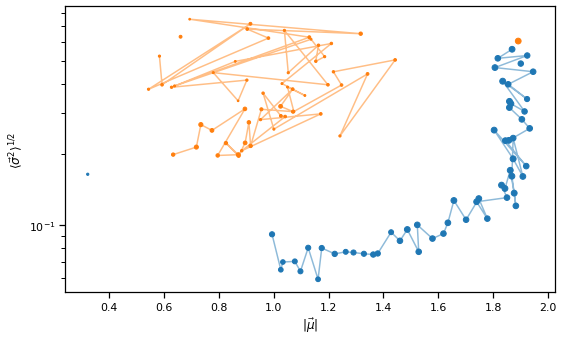

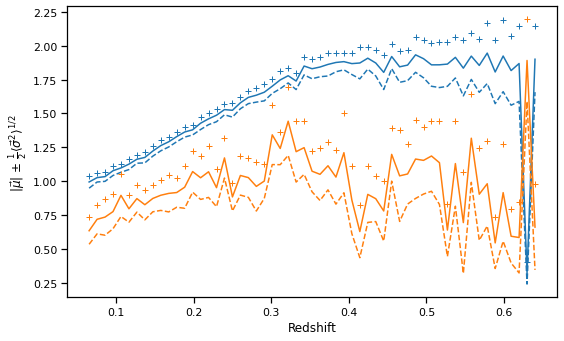

In [197]:
rd = redDragon.dragon('../data/out_2K_test2.h5',factor=-5)
redDragon.plot_WMS(rd)

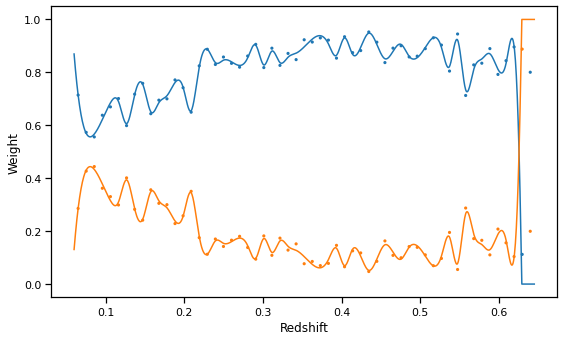

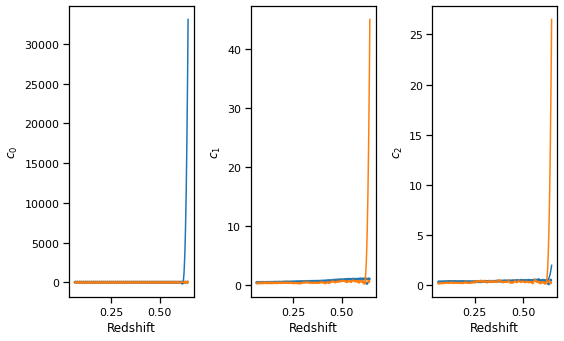

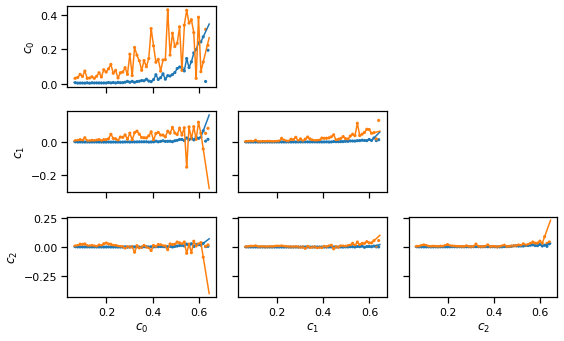

In [198]:
redDragon.plot_fit(rd)

Nice fit excluding the low redshift bin.

In [ ]:
redDragon.fit_file(fname,N_fit=2,fname_out='../data/out_2K_test2.h5',
                   Z_min=0.06, Z_max=0.6,dZ_0=0.030, dZ_1=0.015)

Sparse fitting...
1/17: Z|[0.06,0.09176) -> 2585 galaxies
2/17: Z|[0.09176,0.1235) -> 2398 galaxies
3/17: Z|[0.1235,0.1553) -> 2038 galaxies
4/17: Z|[0.1553,0.1871) -> 1798 galaxies
5/17: Z|[0.1871,0.2188) -> 1543 galaxies
6/17: Z|[0.2188,0.2506) -> 1512 galaxies
7/17: Z|[0.2506,0.2824) -> 1436 galaxies
8/17: Z|[0.2824,0.3141) -> 1133 galaxies
9/17: Z|[0.3141,0.3459) -> 1157 galaxies
10/17: Z|[0.3459,0.3776) -> 1902 galaxies
11/17: Z|[0.3776,0.4094) -> 1367 galaxies
12/17: Z|[0.4094,0.4412) -> 1236 galaxies
13/17: Z|[0.4412,0.4729) -> 1476 galaxies
14/17: Z|[0.4729,0.5047) -> 1706 galaxies
15/17: Z|[0.5047,0.5365) -> 1528 galaxies
16/17: Z|[0.5365,0.5682) -> 1353 galaxies
17/17: Z|[0.5682,0.6) -> 1216 galaxies
Saved ../data/tmp_out_2K_test2.h5
Finer fitting...
Possible problems (large local 2nd deriv in colors):
Odd redshifts: [0.42529]
Errant redshifts: []
1/35: Z|[0.06,0.07543) -> 1392 galaxies
2/35: Z|[0.07543,0.09086) -> 1156 galaxies
dt: 2.1 s (4 s total)
3/35: Z|[0.09086,0.1063) 

/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:907: RuntimeWarning: overflow encountered in exp
  log_S[U[k]] += np.exp(log_p[k]) # actually S, not logS
/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:789: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(log_L_ - log_L) < tol * np.abs(log_L) and moved.size == 0:


dt: 2.8 s (33 s total)
16/35: Z|[0.2914,0.3069) -> 573 galaxies
dt: 2.3 s (36 s total)
17/35: Z|[0.3069,0.3223) -> 556 galaxies
dt: 2.5 s (38 s total)
18/35: Z|[0.3223,0.3377) -> 518 galaxies
dt: 2.6 s (41 s total)
19/35: Z|[0.3377,0.3531) -> 659 galaxies
dt: 2.5 s (43 s total)
20/35: Z|[0.3531,0.3686) -> 1059 galaxies
dt: 2.6 s (46 s total)
21/35: Z|[0.3686,0.384) -> 894 galaxies


In [ ]:
rd = redDragon.dragon('../data/out_2K_test2.h5',factor=-2.)
redDragon.plot_WMS(rd)

In [ ]:
redDragon.plot_fit(rd)

Better fit, I'll chose this one to the fine redshift bin fit.

### 3 Components Fit

Here, we try to fit 3 components.

In [178]:
redDragon.fit_file(fname,N_fit=3,fname_out='../data/out_3K_test.h5',
                   Z_min=0.06, Z_max=0.60,dZ_0=0.03, dZ_1=0.015)

Sparse fitting...
1/17: Z|[0.06,0.09176) -> 2651 galaxies
2/17: Z|[0.09176,0.1235) -> 2426 galaxies
3/17: Z|[0.1235,0.1553) -> 2092 galaxies
4/17: Z|[0.1553,0.1871) -> 1863 galaxies
5/17: Z|[0.1871,0.2188) -> 1584 galaxies
6/17: Z|[0.2188,0.2506) -> 1563 galaxies
7/17: Z|[0.2506,0.2824) -> 1483 galaxies
8/17: Z|[0.2824,0.3141) -> 1182 galaxies
9/17: Z|[0.3141,0.3459) -> 1211 galaxies
10/17: Z|[0.3459,0.3776) -> 1955 galaxies
11/17: Z|[0.3776,0.4094) -> 1426 galaxies
12/17: Z|[0.4094,0.4412) -> 1286 galaxies
13/17: Z|[0.4412,0.4729) -> 1558 galaxies
14/17: Z|[0.4729,0.5047) -> 1854 galaxies
15/17: Z|[0.5047,0.5365) -> 1826 galaxies
16/17: Z|[0.5365,0.5682) -> 1829 galaxies
17/17: Z|[0.5682,0.6) -> 1879 galaxies
Saved ../data/tmp_out_3K_test.h5
Finer fitting...
1/35: Z|[0.06,0.07543) -> 1430 galaxies


/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:907: RuntimeWarning: overflow encountered in exp
  log_S[U[k]] += np.exp(log_p[k]) # actually S, not logS


2/35: Z|[0.07543,0.09086) -> 1182 galaxies
dt: 2.0 s (5 s total)
3/35: Z|[0.09086,0.1063) -> 1337 galaxies
dt: 1.9 s (7 s total)
4/35: Z|[0.1063,0.1217) -> 1020 galaxies
dt: 1.9 s (9 s total)
5/35: Z|[0.1217,0.1371) -> 1084 galaxies
dt: 2.1 s (11 s total)
6/35: Z|[0.1371,0.1526) -> 982 galaxies
dt: 1.8 s (13 s total)
7/35: Z|[0.1526,0.168) -> 855 galaxies
dt: 1.9 s (14 s total)
8/35: Z|[0.168,0.1834) -> 897 galaxies
dt: 2.0 s (16 s total)
9/35: Z|[0.1834,0.1989) -> 1037 galaxies
dt: 1.9 s (18 s total)
10/35: Z|[0.1989,0.2143) -> 528 galaxies


/usr/local/anaconda/lib/python3.8/site-packages/pygmmis.py:789: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(log_L_ - log_L) < tol * np.abs(log_L) and moved.size == 0:


dt: 2.3 s (21 s total)
11/35: Z|[0.2143,0.2297) -> 751 galaxies


/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


dt: 2.1 s (23 s total)
12/35: Z|[0.2297,0.2451) -> 824 galaxies
dt: 2.1 s (25 s total)
13/35: Z|[0.2451,0.2606) -> 680 galaxies
dt: 2.0 s (27 s total)
14/35: Z|[0.2606,0.276) -> 717 galaxies
dt: 2.1 s (29 s total)
15/35: Z|[0.276,0.2914) -> 641 galaxies
dt: 2.6 s (32 s total)
16/35: Z|[0.2914,0.3069) -> 597 galaxies
dt: 2.1 s (34 s total)
17/35: Z|[0.3069,0.3223) -> 587 galaxies
dt: 2.2 s (36 s total)
18/35: Z|[0.3223,0.3377) -> 541 galaxies
dt: 2.4 s (38 s total)
19/35: Z|[0.3377,0.3531) -> 678 galaxies
dt: 2.5 s (41 s total)
20/35: Z|[0.3531,0.3686) -> 1081 galaxies
dt: 2.4 s (43 s total)
21/35: Z|[0.3686,0.384) -> 930 galaxies
dt: 2.8 s (46 s total)
22/35: Z|[0.384,0.3994) -> 640 galaxies
dt: 2.8 s (49 s total)
23/35: Z|[0.3994,0.4149) -> 668 galaxies
dt: 4.9 s (54 s total)
24/35: Z|[0.4149,0.4303) -> 559 galaxies
dt: 3.1 s (57 s total)
25/35: Z|[0.4303,0.4457) -> 679 galaxies
dt: 2.6 s (59 s total)
26/35: Z|[0.4457,0.4611) -> 769 galaxies
dt: 2.4 s (62 s total)
27/35: Z|[0.4611,0.4

Possible problems (large local 2nd deriv in colors):
Odd redshifts: [0.39171 0.56143 0.57686 0.59229]
Errant redshifts: []


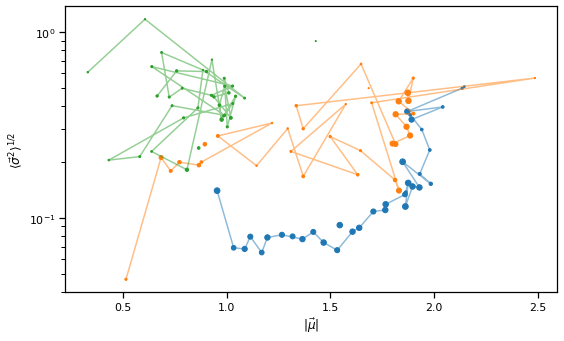

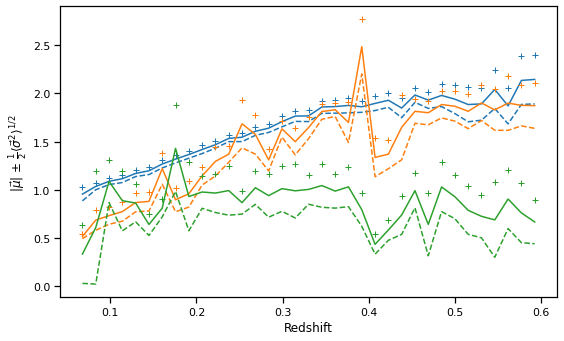

In [183]:
rd = redDragon.dragon('../data/out_3K_test.h5',factor=-2.)
redDragon.plot_WMS(rd)

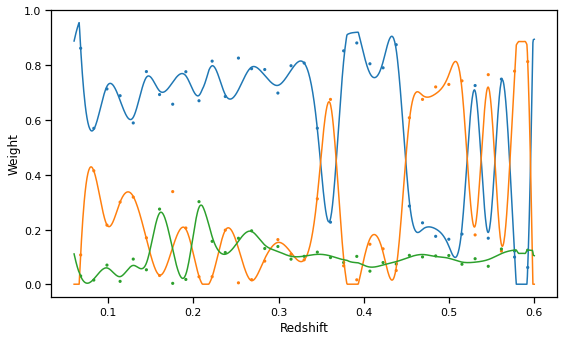

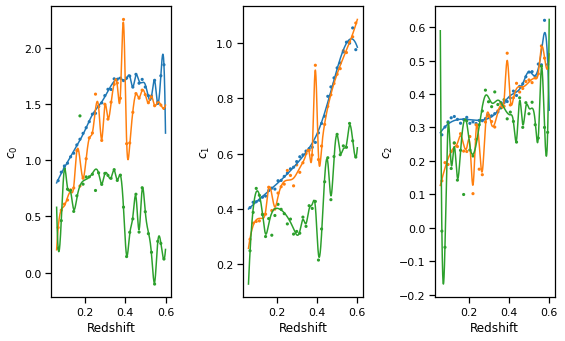

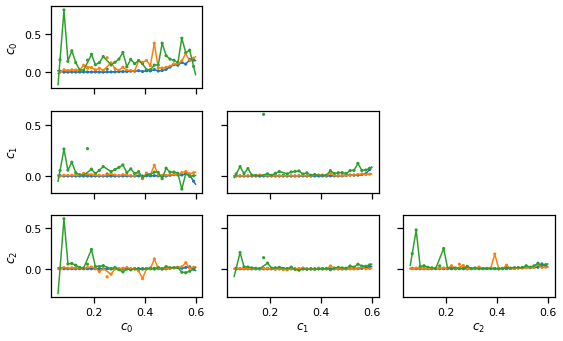

In [184]:
redDragon.plot_fit(rd)

The second component overlaps with the main component (red sequence), up to z~0.4 is possible to distinguish them.

# Preliminary Conclusions
---------------------------------------

July 28th, my remarks are:

* Selecting only cluster galaxies we can constrain the red sequence (z<0.4) but not the blue cloud, mainly because we don't have enough statistics.

* With the whole sample we can constrain both the red sequence and the blue cloud up to redshift 0.6, also we can distinguish the two distributions in almost all redshift bins.


In [42]:
# rd = redDragon.dragon(path+'/output/fit_SDSS_3K.h5')
# rd = redDragon.plot_fit(path+'/output/fit_SDSS_2K.h5')

In [43]:
help(redDragon)

Help on module rd_gamma:

NAME
    rd_gamma - # including photometric errors

CLASSES
    builtins.object
        dragon
    
    class dragon(builtins.object)
     |  dragon(fname, factor=0.5)
     |  
     |  rd = dragon('input.h5')
     |  rd.P_red(Z,bands)
     |  
     |  # back-end tools:
     |  rd.covar(Z)
     |  
     |  Methods defined here:
     |  
     |  P_red(self, Z, bands, bands_err=None)
     |  
     |  __init__(self, fname, factor=0.5)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __str__(self)
     |      Return str(self).
     |  
     |  get_P(self, Z, bands, bands_err=None)
     |  
     |  get_WMS(self)
     |      get {weights, colors, scatters}, summed across colors
     |  
     |  get_corr(self, Z)
     |      return correlation matrix for given redshift(s)
     |  
     |  get_covars(self, Z)
     |      returns covariance matrix for given redshift(s)
     |  
     |  get_gmm(self, Z)
     |  
     |  get_logL

In [44]:
# redDragon.fit_file(fname_in='data.h5',N_fit=3,fname_out='out.h5')

In [45]:
#!conda install -c conda-forge astroquery

In [46]:
from astropy.table import Table,vstack

In [47]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

## Example
rac,dec= Cluster_data['RA'][0],Cluster_data['DEC'][0]
pos = coords.SkyCoord(rac,dec, frame='icrs', unit='deg')

r   = 2*Cluster_data.R200C_DEG[0]*u.deg
xid = SDSS.query_region(pos, radius=r, spectro=True)

/usr/local/anaconda/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [48]:
columns = SDSS.query_region(pos,field_help=True)

In [49]:
columns.keys()

dict_keys(['photoobj_all', 'specobj_all'])

In [50]:
list(columns['photoobj_all'])

['objID',
 'skyVersion',
 'run',
 'rerun',
 'camcol',
 'field',
 'obj',
 'mode',
 'nChild',
 'type',
 'clean',
 'probPSF',
 'insideMask',
 'flags',
 'rowc',
 'rowcErr',
 'colc',
 'colcErr',
 'rowv',
 'rowvErr',
 'colv',
 'colvErr',
 'rowc_u',
 'rowc_g',
 'rowc_r',
 'rowc_i',
 'rowc_z',
 'rowcErr_u',
 'rowcErr_g',
 'rowcErr_r',
 'rowcErr_i',
 'rowcErr_z',
 'colc_u',
 'colc_g',
 'colc_r',
 'colc_i',
 'colc_z',
 'colcErr_u',
 'colcErr_g',
 'colcErr_r',
 'colcErr_i',
 'colcErr_z',
 'sky_u',
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'skyIvar_u',
 'skyIvar_g',
 'skyIvar_r',
 'skyIvar_i',
 'skyIvar_z',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'fiber2Mag_u',
 'fiber2Mag_g',
 'fiber2Mag_r',
 'fiber2Mag_i',
 'fiber2Mag_z',
 'fiber2

In [51]:
list(columns['specobj_all'])

['specObjID',
 'bestObjID',
 'fluxObjID',
 'targetObjID',
 'plateID',
 'sciencePrimary',
 'sdssPrimary',
 'legacyPrimary',
 'seguePrimary',
 'segue1Primary',
 'segue2Primary',
 'bossPrimary',
 'bossSpecObjID',
 'firstRelease',
 'survey',
 'instrument',
 'programname',
 'chunk',
 'platerun',
 'mjd',
 'plate',
 'fiberID',
 'run1d',
 'run2d',
 'tile',
 'designID',
 'legacy_target1',
 'legacy_target2',
 'special_target1',
 'special_target2',
 'segue1_target1',
 'segue1_target2',
 'segue2_target1',
 'segue2_target2',
 'boss_target1',
 'eboss_target0',
 'eboss_target1',
 'eboss_target2',
 'eboss_target_id',
 'ancillary_target1',
 'ancillary_target2',
 'thing_id_targeting',
 'thing_id',
 'primTarget',
 'secTarget',
 'spectrographID',
 'sourceType',
 'targetType',
 'ra',
 'dec',
 'cx',
 'cy',
 'cz',
 'xFocal',
 'yFocal',
 'lambdaEff',
 'blueFiber',
 'zOffset',
 'z',
 'zErr',
 'zWarning',
 'class',
 'subClass',
 'rChi2',
 'DOF',
 'rChi2Diff',
 'z_noqso',
 'zErr_noqso',
 'zWarning_noqso',
 'clas

In [52]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],xid['specobjid'])]

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.57187,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.86461,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.79602,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.66004,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.64952,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,119.68401,54.012931,2.105543e+18,1_1172,0.104336,0.000022,0,444.889481,17.17121,0.005671,...,2252074960060432,0.129801,16.82756,0.006108,2252074960060432,0.066728,16.49989,0.013060,2252074960060432,0.049633
270,119.71908,54.019926,2.105544e+18,1_1172,0.101207,0.000020,0,-405.850120,17.56311,0.007197,...,275163152896,0.129726,16.91958,0.007223,275163152896,0.066690,16.62916,0.016645,275297370624,0.049605
271,119.90482,54.172851,2.105558e+18,1_1172,-0.000458,0.000028,0,-28045.690818,17.98277,0.006932,...,276856832,0.114275,18.28871,0.010409,268468224,0.058746,18.62080,0.044731,275146506240,0.043696
272,119.91278,54.340320,2.106645e+18,1_1172,-0.000026,0.000008,0,-27928.228623,16.87777,0.020537,...,18085042401482009,0.119677,14.16375,0.005414,288441757264154649,0.061523,14.67629,0.019938,9218580635090969,0.045762


In [53]:
def query_galaxy_sample(cluster):
    rac,dec= cluster['RA'],cluster['DEC']
    radii  = 2*cluster.R200C_DEG
    cid    = cluster.CLUS_ID
    
    data    = []
    for i in range(len(cluster)):
        print('Cluster ID: %s'%(cid[i]))
        
        pos = coords.SkyCoord(rac[i],dec[i], frame='icrs', unit='deg')
        r   = 2*radii[i]*u.deg
        xid = SDSS.query_region(pos, radius=r, spectro=True)
        data.append(xid)
        print('nobj : %i'%(len(xid)))
        print('\n')
        
    return vstack(data)

In [54]:
#new_galaxy = query_galaxy_sample(Cluster_data[:5])

In [55]:
#new_galaxy

In [56]:
#Galaxy_data[np.in1d(Galaxy_data['specobjid'],new_galaxy['specobjid'])]

Color Analysis
---------------------------------------

First step investigating the color distribution

In [57]:
import sys
import os
sys.path.append(os.path.abspath("/home/johnny/Documents/2ndPhase/ccopa_mag/bma/"))
import gaussianKDE as kde
from colorModeling import *

ModuleNotFoundError: No module named 'gaussianKDE'

In [ ]:
cat = Table.from_pandas(Cluster_data.iloc[np.unique(id1)])
cat['CID'] = np.unique(id1)
cat.rename_column('Z_LAMBDA','redshift')

In [ ]:
gal        = Table.from_pandas(Galaxy_data.iloc[id0])
gal['CID'] = id1

In [ ]:
gal['redshift'] = np.array(cat['redshift'][id1])
gal['Rnorm']    = radii/rmax[id1]
gal['cut']      = cut

In [ ]:
z_cls       = np.array(cat['redshift'])
ids_cls     = cat['CID']
ids_cls_gal = gal['CID']

In [ ]:
gal['mag']    = np.array([gal['cModelMag_%s'%li] for li in ['g','r','i','z']]).T
gal['magerr'] = np.array([gal['cModelMagErr_%s'%li] for li in ['g','r','i','z']]).T

In [ ]:
### defining color variables
color_list = ['gr','ri','iz']
ecolor_list = [ci+'_err' for ci in color_list]

color_value = [(0,1),(1,2),(2,3)]
mag_list = [1,2,3]
gal = set_color_variables(gal,color_list,ecolor_list,color_value)

In [ ]:
gal['Pmem'] = np.ones_like(gal['z'])

In [ ]:
cutr = cut&(gal['Rnorm']<=1.)
indicies_unique = list(chunks(ids_cls_gal[cutr],ids_cls))         ## per cluster

In [ ]:
print('Gaussian Mixture Modeling')
gmm_parameters = computeGMM_AllColors(gal[cutr],z_cls,ids_cls,indicies_unique,color_list=color_list,filter=True)

In [ ]:
def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w
    pass

def fitPoly(x,y,x_new,norder=3):
    z = np.polyfit(x, y, norder)
    zp = np.poly1d(z)
    y_new = zp(x_new)
    
    y_new = np.where(y_new<0.,0.,y_new)
    return y_new

def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

def get_RS_flag(gal,gmm_parameters,nsigma=2,color_list=['g-r']):
    zcls = gal['z']
    z = gmm_parameters['redshift']
    
    gal['rs_flag'] = np.zeros_like(gal['mag'][:,1:],dtype=int)
    vec = np.zeros_like(gal['mag'][:,1:],dtype=int)
    
    gal['dcolor'] = np.zeros_like(gal['mag'][:,1:],dtype=float)
    
    pmem = gal["Pmem"]
    for j,li in enumerate(color_list):
        color = gal[li]
        
        zrs = gmm_parameters['redshift']
        mur = gmm_parameters['rs_param_%s'%(li)][:,0]
        sigr = gmm_parameters['rs_param_%s'%(li)][:,1]
        
        mur2 = fitPoly(zrs,mur,zrs)
        sigr2 = fitPoly(zrs,sigr,zrs)
        
        w, = np.where(sigr<1e-2)
        sigr[w] = sigr2[w]
        
        w, = np.where(np.abs(mur-mur2)>2*sigr)
        sigr[w] = sigr2[w]
        
        cb_upper = mur+nsigma*sigr
        cb_lower = mur-nsigma*sigr
        
        indices = list(chunks(gal['CID'], gmm_parameters['CID']))
        for i,idx in enumerate(indices):
            gal['rs_flag'][idx,j] = np.where((color[idx]<=cb_upper[i])&(color[idx]>=cb_lower[i]),int(1),int(0))
            vec[idx,j] = np.where((color[idx]>=cb_upper[i]),1,0)
            gal['dcolor'][idx,j] = color[idx]-mur[i]
        
        gal['rs_bad'] = np.sum(vec,axis=1)
        gal['red_score'] = np.sum(gal["rs_flag"],axis=1)
    return gal

In [ ]:
color_list = ['gr','ri','iz']
color_label= [r'(%s-%s)'%(li[0],li[1]) for li in color_list]
z_label = 'redshift'

zbins = np.arange(0.05,0.65,0.05)
print("# color label:")
print(color_label)

In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=3
gal = get_RS_flag(gal,gmm_parameters,nsigma=nsigma,color_list=color_list)

In [ ]:
## Color Model: GMM

In [ ]:
from scipy import interpolate
import scipy.stats as st
from scipy.interpolate import interp1d

def interpData(x,y,x_new):
    out = interp1d(x, y, kind='cubic', fill_value='extrapolate')
    return out(x_new)

def interpDataBinned(x,y,x_edges,x_new):
    keys,x_bin = makeBins(x,x_edges)
    y_bin = np.array([ np.nanmedian(y[idx]) for idx in keys])
    y_new = interpData(x_bin,y_bin,x_new)    
    return y_new

def get_color_model(gmm,zbins):
    """ It gets the mean of the GMM parameters
    """
    gmm_new = gmm.copy()
    zcls=np.array(gmm['redshift'])
    
    for cl in color_list:
        gmm_rs = np.array(gmm['rs_param_%s'%cl][:,0])
        gmm_bc = np.array(gmm['bc_param_%s'%cl][:,0])
        
        gmm_rs_sig = np.array(gmm['rs_param_%s'%cl][:,1])
        gmm_bc_sig = np.array(gmm['bc_param_%s'%cl][:,1])
        
        gmm_rs_alp = gmm['rs_param_%s'%cl][:,2]
        gmm_bc_alp = gmm['bc_param_%s'%cl][:,2]
        
        gmm_rs_new = interpDataBinned(zcls,gmm_rs,zbins,zcls)
        gmm_bc_new = interpDataBinned(zcls,gmm_bc,zbins,zcls)
        
        gmm_rs_sig_new = fitPoly(zcls,gmm_rs_sig,zcls)
        gmm_bc_sig_new = fitPoly(zcls,gmm_bc_sig,zcls)
        
        gmm_rs_alp_new = fitPoly(zcls,gmm_rs_alp,zcls)
        gmm_bc_alp_new = fitPoly(zcls,gmm_bc_alp,zcls)
        
        
        gmm_new['rs_param_%s'%cl][:,0] = gmm_rs_new
        gmm_new['bc_param_%s'%cl][:,0] = gmm_bc_new
        
        gmm_new['rs_param_%s'%cl][:,1] = gmm_rs_sig_new
        gmm_new['bc_param_%s'%cl][:,1] = gmm_bc_sig_new
        
        gmm_new['rs_param_%s'%cl][:,2] = gmm_rs_alp_new
        gmm_new['bc_param_%s'%cl][:,2] = gmm_bc_alp_new
        
    return gmm_new

In [ ]:
gmm = gmm_parameters

In [ ]:
zcls = gmm_parameters['redshift']
zbins = np.arange(0.05,0.7,0.05)

## get a new GMM model
gmm_new = get_color_model(gmm,zbins)

print("redshift bins: width=0.075")
print(zbins)

In [ ]:
## Mean Color
from aux_functions import validating_color_model_grid

validating_color_model_grid(gmm,gmm_new,color_list,lcolor=color_label)
plt.xlim(0.,0.6)
plt.suptitle("Mean Color",fontsize=24)
plt.savefig("gmm_color_model_mean_color.png",bb_box="tight")

In [ ]:
## Width
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,sigma=True)
plt.suptitle("Width",fontsize=24)
plt.savefig("gmm_color_model_width_color.png",bb_box="tight")

In [ ]:
## Weights
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,fraction=True)
plt.suptitle("Weights",fontsize=24)
plt.savefig("gmm_color_model_wights_color.png",bb_box="tight")

In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=2
gal = get_RS_flag(gal,gmm_new,nsigma=nsigma,color_list=color_list)

In [ ]:
def print_red_fractions(g):
    ntotal = len(g['CID'])
    print("# red sequence fraction")
    for i,li in enumerate(color_label):
        nrs = np.sum(g["rs_flag"][:,i])
        print('  %s : %.2f'%(li,nrs/ntotal))
    pass

In [ ]:
w, = np.where(gal['redshift']<0.35)
print("galaxies with z<0.35")
print_red_fractions(gal[w])

In [ ]:
w, = np.where((gal['redshift']>0.35)&(gal['redshift']<0.65))
print("galaxies with 0.35< z < 0.65")
print_red_fractions(gal[w])

In [ ]:
def plot_rs_fraction(gal):
    zgal=gal["redshift"]
    keys,zmeans = makeBins(zgal,zbins)
    rs_frac = np.array([np.sum(gal['rs_flag'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
    for i,li in enumerate(color_label):
        plt.plot(zmeans,rs_frac[:,i])
        plt.scatter(zmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

    plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(z_label)
#     plt.ylim(0.35,1.)
    plt.legend()

In [ ]:

# ## 4000 Ang break
# ## 0.35, 0.69, 1.06 - g, r, i bands
# w1, = np.where(zrs<=0.35)
# w2, = np.where((zrs<=0.35)&(zrs<=0.69))
# w3, = np.where((zrs<=0.69)&(zrs<=1.06))

# rs_score = np.sum(gal["rs_flag"],axis=1)

In [ ]:
field = vlos>3000.

In [ ]:
plot_rs_fraction(gal[cut])
plot_rs_fraction(gal[field])
#plt.savefig('red_sequence_fraction.png')

In [ ]:
def plot_rs_profile(gal,rbins=np.linspace(0.,2.0,11)):
    radii=gal["Rnorm"]
    keys,rmeans = makeBins(radii,rbins)
    rs_frac = np.array([np.sum(gal['rs_flag'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
    for i,li in enumerate(color_label):
        plt.plot(rmeans,rs_frac[:,i])
        plt.scatter(rmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

#     plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(rlabel,fontsize=20)
#     plt.ylim(0.35,1.)
    plt.legend()

In [ ]:
cut2 = cut&(gal['redshift']<0.65)

In [ ]:
plot_rs_profile(gal[cut2])
plot_rs_profile(gal[field])

In [ ]:
rs_flag = gal['rs_flag'][:,0]

In [ ]:
# def plot_phase_space():
plt.scatter(rnorm[cut2][::5],vlos[cut2][::5],c=rs_flag[cut2][::5],alpha=0.3,s=20,cmap='jet')
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}$ [km/s]',fontsize=16)